In [1]:
import pandas as pd
import warnings
import datetime
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import OrderedDict
warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
flights = pd.read_csv("flights.csv", low_memory=False)

In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.info()
aiports = airports.dropna().reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [5]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
num_of_flights = flights['ORIGIN_AIRPORT'].value_counts()
num_of_flights

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In [7]:
projPC = ccrs.PlateCarree()
lonW = -160
lonE = -40
latS = 15
latN = 75
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

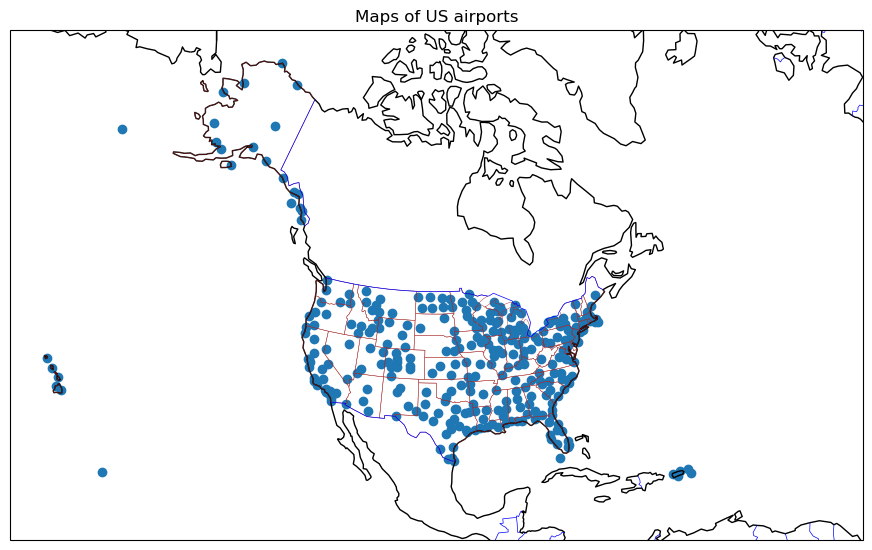

In [32]:
projLcc = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
fig = plt.figure(figsize=(11, 8.5))

ax = plt.subplot(1, 1, 1, projection=projLcc)
ax.set_title('Maps of US airports')
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')
# End last line with a semicolon to suppress text output to the screen
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');
x = airports['LATITUDE'].tolist()
y = airports['LONGITUDE'].tolist()
plt.scatter(x = airports.LONGITUDE, y = airports.LATITUDE, transform=ccrs.PlateCarree());

In [9]:
flights = flights[flights['MONTH'] == 1]

In [10]:
flights['DATE'] = pd.to_datetime(flights[["YEAR", "MONTH", "DAY"]])

In [11]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,2015,1,31,6,B6,839,N658JB,JFK,BQN,2359,2359.0,0.0,18.0,17.0,221.0,200.0,179.0,1576,416.0,3.0,440,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469964,2015,1,31,6,DL,1887,N855NW,SEA,DTW,2359,2359.0,0.0,16.0,15.0,252.0,239.0,209.0,1927,644.0,14.0,711,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469965,2015,1,31,6,F9,300,N218FR,DEN,TPA,2359,2.0,3.0,35.0,37.0,192.0,212.0,168.0,1506,525.0,9.0,511,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0,2015-01-31
469966,2015,1,31,6,F9,422,N954FR,DEN,ATL,2359,2359.0,0.0,40.0,39.0,162.0,191.0,141.0,1199,500.0,10.0,441,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0,2015-01-31


In [12]:
def format_hour(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if chain == 2400: chain = 0
        chain = "{0:04d}".format(int(chain))
        heure = datetime.time(int(chain[0:2]), int(chain[2:4]))
        return heure

def combine_date_hour(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

def create_flight_time(df, col):    
    list = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            list.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list.append(combine_date_hour(cols))
        else:
            cols[1] = format_hour(cols[1])
            list.append(combine_date_hour(cols))
    return pd.Series(list)

In [13]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')


In [14]:
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_hour)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_hour)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_hour)
#__________________________________________________________________________
flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


Text(0, 0.5, 'Number of cancellations')

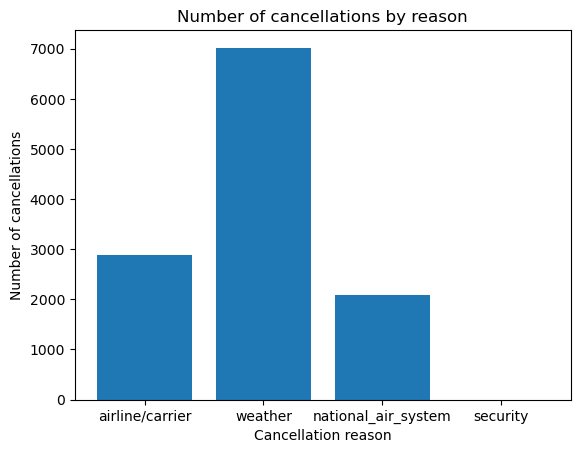

In [15]:
reasons = flights.groupby(["CANCELLATION_REASON"]).size()
data = {'airline/carrier':reasons[0], 'weather':reasons[1], 'national_air_system':reasons[2], 'security':reasons[3]}
keys = list(data.keys())
values = list(data.values())
plt.bar(keys, values)
plt.title("Number of cancellations by reason")
plt.xlabel("Cancellation reason")
plt.ylabel("Number of cancellations")

In [16]:
flights.drop(['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME'], axis = 1, inplace = True)

In [17]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469968 entries, 0 to 469967
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AIRLINE              469968 non-null  object        
 1   ORIGIN_AIRPORT       469968 non-null  object        
 2   DESTINATION_AIRPORT  469968 non-null  object        
 3   SCHEDULED_DEPARTURE  469968 non-null  datetime64[ns]
 4   DEPARTURE_TIME       458311 non-null  object        
 5   DEPARTURE_DELAY      458311 non-null  float64       
 6   SCHEDULED_TIME       469968 non-null  float64       
 7   ELAPSED_TIME         457013 non-null  float64       
 8   DISTANCE             469968 non-null  int64         
 9   SCHEDULED_ARRIVAL    469968 non-null  object        
 10  ARRIVAL_TIME         457697 non-null  object        
 11  ARRIVAL_DELAY        457013 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 62.7

In [18]:
flights.dropna(inplace = True)

In [19]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457013 entries, 0 to 469967
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   AIRLINE              457013 non-null  object        
 1   ORIGIN_AIRPORT       457013 non-null  object        
 2   DESTINATION_AIRPORT  457013 non-null  object        
 3   SCHEDULED_DEPARTURE  457013 non-null  datetime64[ns]
 4   DEPARTURE_TIME       457013 non-null  object        
 5   DEPARTURE_DELAY      457013 non-null  float64       
 6   SCHEDULED_TIME       457013 non-null  float64       
 7   ELAPSED_TIME         457013 non-null  float64       
 8   DISTANCE             457013 non-null  int64         
 9   SCHEDULED_ARRIVAL    457013 non-null  object        
 10  ARRIVAL_TIME         457013 non-null  object        
 11  ARRIVAL_DELAY        457013 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 45.3

In [20]:
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
469963,B6,JFK,BQN,2015-01-31 23:59:00,23:59:00,0.0,221.0,200.0,1576,04:40:00,04:19:00,-21.0
469964,DL,SEA,DTW,2015-01-31 23:59:00,23:59:00,0.0,252.0,239.0,1927,07:11:00,06:58:00,-13.0
469965,F9,DEN,TPA,2015-01-31 23:59:00,00:02:00,3.0,192.0,212.0,1506,05:11:00,05:34:00,23.0
469966,F9,DEN,ATL,2015-01-31 23:59:00,23:59:00,0.0,162.0,191.0,1199,04:41:00,05:10:00,29.0


In [21]:
airlines.columns = ["IATA", "NAME"]
airlines

,IATA,NAME
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [22]:
flights['AIRLINE'] = flights['AIRLINE'].map(airlines.set_index('IATA')['NAME'])
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,Alaska Airlines Inc.,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0
1,American Airlines Inc.,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0
2,US Airways Inc.,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0
3,American Airlines Inc.,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0
4,Alaska Airlines Inc.,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
469963,JetBlue Airways,JFK,BQN,2015-01-31 23:59:00,23:59:00,0.0,221.0,200.0,1576,04:40:00,04:19:00,-21.0
469964,Delta Air Lines Inc.,SEA,DTW,2015-01-31 23:59:00,23:59:00,0.0,252.0,239.0,1927,07:11:00,06:58:00,-13.0
469965,Frontier Airlines Inc.,DEN,TPA,2015-01-31 23:59:00,00:02:00,3.0,192.0,212.0,1506,05:11:00,05:34:00,23.0
469966,Frontier Airlines Inc.,DEN,ATL,2015-01-31 23:59:00,23:59:00,0.0,162.0,191.0,1199,04:41:00,05:10:00,29.0


In [23]:
def get_stats(airline):
    return {'count': airline.count(), 'min':airline.min(), 'max':airline.max(), 'mean': airline.mean()}

In [24]:
stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
stats = stats.sort_values('count', ascending = False)
stats

,count,min,max,mean
AIRLINE,,,,
Southwest Airlines Co.,98060.0,-15.0,604.0,9.453426
Delta Air Lines Inc.,63676.0,-26.0,1184.0,5.888215
Atlantic Southeast Airlines,48084.0,-33.0,726.0,9.678895
Skywest Airlines Inc.,46655.0,-48.0,931.0,11.999957
American Airlines Inc.,43074.0,-29.0,1988.0,10.548335
United Air Lines Inc.,37363.0,-40.0,886.0,13.885555
US Airways Inc.,32478.0,-26.0,638.0,5.175011
American Eagle Airlines Inc.,27568.0,-29.0,780.0,15.995865
JetBlue Airways,20482.0,-27.0,500.0,9.988331


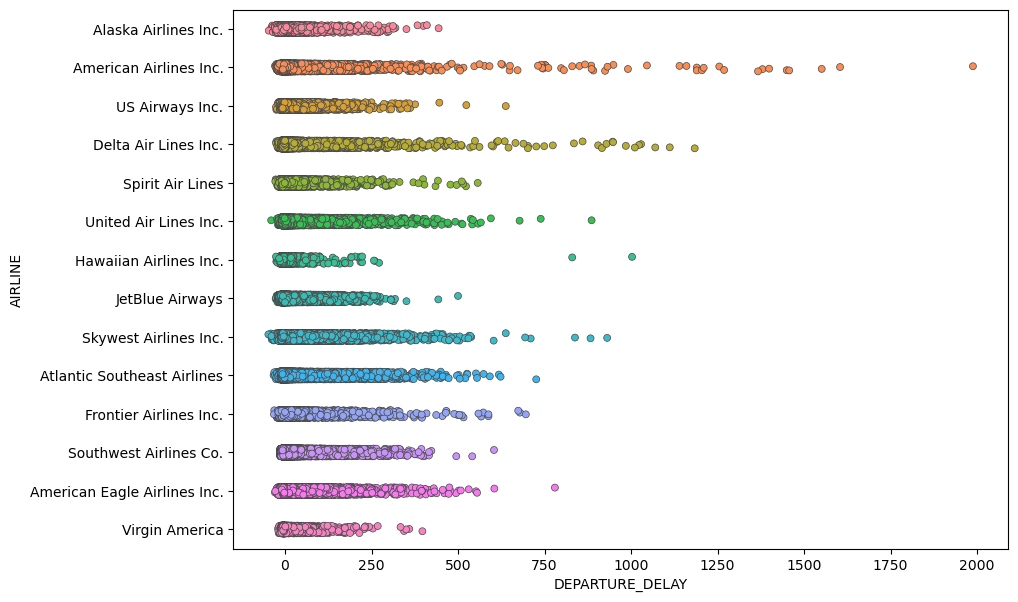

In [25]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.stripplot(x = flights['DEPARTURE_DELAY'], y = flights["AIRLINE"], linewidth=0.5)


In [26]:
delay_type = lambda x:((0,1)[x > 15],2)[x > 45]
flights['DELAY_TYPE'] = flights['DEPARTURE_DELAY'].apply(delay_type)

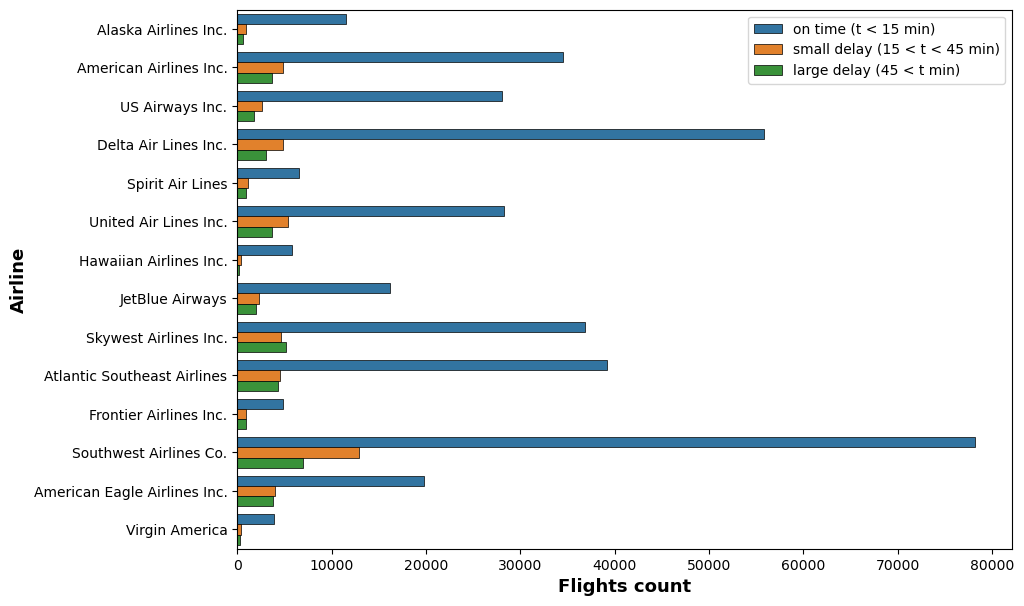

In [27]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y = flights["AIRLINE"], hue = flights["DELAY_TYPE"], linewidth = 0.5, edgecolor = 'black')
plt.xlabel("Flights count", size = 13, weight = 'bold')
plt.ylabel("Airline", size = 13, weight = 'bold')
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 15 min)')
L.get_texts()[1].set_text('small delay (15 < t < 45 min)')
L.get_texts()[2].set_text('large delay (45 < t min)')

In [28]:
companies = airlines.set_index('IATA')['NAME'].to_dict()

In [29]:
origin_nb = dict()
for carrier in companies.values():
    list_origin_airports = flights[flights['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(list_origin_airports)

In [30]:
origin_nb

{'United Air Lines Inc.': 77,
 'American Airlines Inc.': 81,
 'US Airways Inc.': 74,
 'Frontier Airlines Inc.': 63,
 'JetBlue Airways': 57,
 'Skywest Airlines Inc.': 175,
 'Alaska Airlines Inc.': 59,
 'Spirit Air Lines': 33,
 'Southwest Airlines Co.': 86,
 'Delta Air Lines Inc.': 145,
 'Atlantic Southeast Airlines': 166,
 'Hawaiian Airlines Inc.': 17,
 'American Eagle Airlines Inc.': 122,
 'Virgin America': 18}

Text(0, 0.5, 'Number of visited airports')

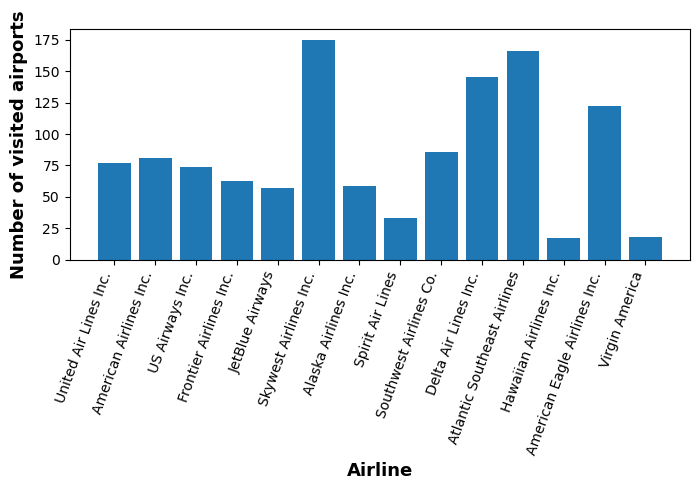

In [33]:
fig = plt.figure(figsize = (8, 3))
ax = plt.bar(keys, values)
keys = list(origin_nb.keys())
values = list(origin_nb.values())
plt.xticks(rotation = 70, ha = 'right')
plt.xlabel("Airline", size = 13, weight = 'bold')
plt.ylabel("Number of visited airports", size = 13, weight = 'bold')


In [35]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in companies.keys():
    df1 = flights[flights['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed